In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
numerical_features = ['num_ratings_x', 'avg_rating_x', 'std_rating_x', 'max_rating_x', 'min_rating_x',
                        'num_ratings_y', 'avg_rating_y', 'std_rating_y', 'max_rating_y', 'min_rating_y',
                        'avg_category_rating', 'avg_publisher_rating']
categorical_features = ['publish_year','categories']


In [43]:
# Load the dataset
ratings = pd.read_csv('./data/train.csv')
user_features = pd.read_csv('./data/user_features.csv')
book_features = pd.read_csv('./data/books_features.csv')

# Merge user and book features with the ratings dataset
ratings = pd.merge(ratings, user_features, on='user_id', how='left')
ratings = pd.merge(ratings, book_features, on='book_id', how='left')
print(ratings.shape)
ratings.head()

(100523, 19)


,book_id,user_id,rating,num_ratings_x,avg_rating_x,std_rating_x,max_rating_x,min_rating_x,num_ratings_y,avg_rating_y,std_rating_y,max_rating_y,min_rating_y,published_date,categories,publisher,publish_year,avg_category_rating,avg_publisher_rating
0,7260,20145,3.5,16,2.375000,0.619139,3.5,1.5,4,2.625000,0.629153,3.5,2.0,1992,California,NaN,1992.0,1.984848,NaN
1,243238,85182,4.0,1,4.000000,NaN,4.0,4.0,28,3.571429,1.230133,5.0,1.0,NaN,Unknown,NaN,NaN,2.869511,NaN
2,9135,45973,1.0,134,1.824627,0.723550,4.5,1.0,9,1.833333,0.968246,3.5,1.0,2004-01-01,Biography & Autobiography,Grand Central Publishing,2004.0,2.081125,2.155975
3,18671,63554,3.0,13,3.000000,0.912871,5.0,1.5,7,2.785714,1.253566,5.0,1.0,1974,Juvenile Fiction,Laurel Leaf,1974.0,2.046575,1.761682
4,243293,81002,5.0,1,5.000000,NaN,5.0,5.0,19,4.000000,0.942809,5.0,2.0,NaN,Unknown,NaN,NaN,2.869511,NaN


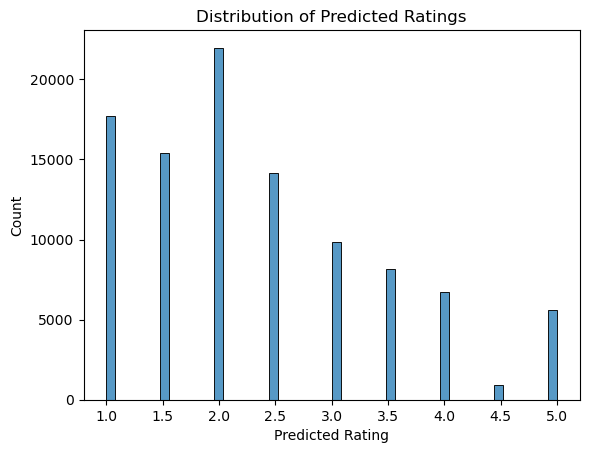

Prediction Statistics:
count    100523.000000
mean          2.361738
std           1.106863
min           1.000000
25%           1.500000
50%           2.000000
75%           3.000000
max           5.000000
Name: rating, dtype: float64


In [44]:
sns.histplot(ratings['rating'], bins=50)
plt.title('Distribution of Predicted Ratings')
plt.xlabel('Predicted Rating')
plt.ylabel('Count')
plt.show()
print("Prediction Statistics:")
print(pd.Series(ratings['rating']).describe())

In [45]:
one_time_user = user_features[user_features['num_ratings'] == 1].user_id.unique()
ratings = ratings[~ratings['user_id'].isin(one_time_user)]
ratings.shape

(89290, 19)

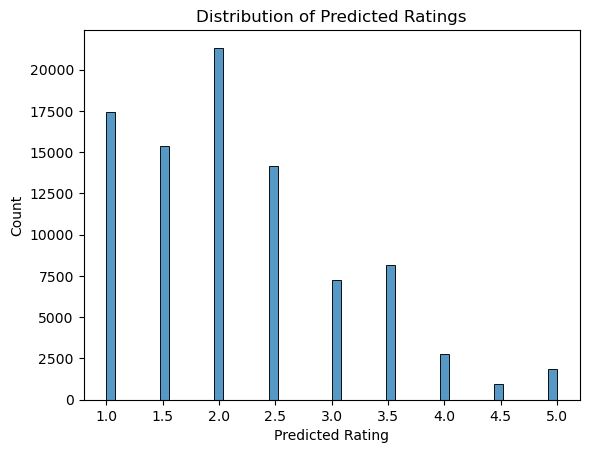

Prediction Statistics:
count    89290.000000
mean         2.166855
std          0.956257
min          1.000000
25%          1.500000
50%          2.000000
75%          2.500000
max          5.000000
Name: rating, dtype: float64


In [46]:
sns.histplot(ratings['rating'], bins=50)
plt.title('Distribution of Predicted Ratings')
plt.xlabel('Predicted Rating')
plt.ylabel('Count')
plt.show()
print("Prediction Statistics:")
print(pd.Series(ratings['rating']).describe())

In [47]:
# Encode categorical features
for feature in categorical_features:
    ratings[feature] = LabelEncoder().fit_transform(ratings[feature])
# Fill missing values with mean
ratings[numerical_features] = ratings[numerical_features].fillna(ratings[numerical_features].mean())
# Scale numerical features
scaler = StandardScaler()
ratings[numerical_features] = scaler.fit_transform(ratings[numerical_features])

# Split the data into train and test sets
X = ratings[numerical_features + categorical_features]
y = ratings['rating']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1234)

display(X_train.head())
display(y_train.head())

,num_ratings_x,avg_rating_x,std_rating_x,max_rating_x,min_rating_x,num_ratings_y,avg_rating_y,std_rating_y,max_rating_y,min_rating_y,avg_category_rating,avg_publisher_rating,publish_year,categories
15887,-0.192373,-0.598662,-0.738640,-1.372519,-0.434007,-0.538724,0.905630,1.222951,0.964261,0.541451,-0.650288,0.000000,56,177
52166,-0.067928,0.612782,0.203214,0.896441,-0.434007,-0.538724,1.819129,0.266199,0.964261,1.496512,1.785403,0.000000,84,691
422,0.115464,0.050877,0.815607,0.896441,-0.434007,-0.673412,1.514629,-0.378948,-0.166818,2.451572,-0.420787,0.007804,63,468
72661,-0.254596,-0.269565,0.474190,0.329201,0.366317,-0.336691,0.905630,-0.338231,0.398722,0.541451,-0.420787,0.295502,67,468
70240,0.377454,0.156429,0.762701,1.463681,-0.434007,2.323412,0.059054,0.129525,1.529801,-0.413610,-0.420787,0.295502,67,468


15887    2.5
52166    4.5
422      3.5
72661    1.5
70240    2.0
Name: rating, dtype: float64

In [48]:
# Train a model (Gradient Boosting Regressor)
model = GradientBoostingRegressor(random_state=42)
# model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the validation set
y_pred = model.predict(X_valid)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print(f"Validation RMSE: {rmse:.4f}")

Validation RMSE: 0.6444


# Prediction!

In [49]:
test_data = pd.read_csv('./data/test.csv')
test_data = pd.merge(test_data, user_features, on='user_id', how='left')
test_data = pd.merge(test_data, book_features, on='book_id', how='left')
test_data['num_ratings_x'] = test_data['num_ratings_x'].apply(lambda x: x+1)
test_data['num_ratings_y'] = test_data['num_ratings_y'].apply(lambda x: x+1)
test_data.head()

,id,book_id,user_id,num_ratings_x,avg_rating_x,std_rating_x,max_rating_x,min_rating_x,num_ratings_y,avg_rating_y,std_rating_y,max_rating_y,min_rating_y,published_date,categories,publisher,publish_year,avg_category_rating,avg_publisher_rating
0,0,3786,40484,32,1.935484,0.981002,4.5,1.0,26,2.040000,1.069657,4.5,1.0,2001,Fiction,NaN,2001.0,2.155410,NaN
1,1,1985,47039,9,2.437500,0.678101,3.5,1.5,49,1.666667,0.529284,2.5,1.0,1987,Fiction,Fawcett,1987.0,2.155410,2.137576
2,2,2290,60111,5,1.000000,0.000000,1.0,1.0,98,1.634021,0.824480,5.0,1.0,1997,Biography & Autobiography,Doubleday,1997.0,2.081125,1.993952
3,3,118657,64447,86,2.617647,0.974823,5.0,1.0,2,1.000000,NaN,1.0,1.0,NaN,Unknown,NaN,NaN,2.869511,NaN
4,4,1560,2953,46,1.977778,0.648035,3.5,1.0,16,2.666667,0.899735,4.5,1.5,2000,Fiction,Plume Books,2000.0,2.155410,2.102612


In [50]:
# Encode categorical features
for feature in categorical_features:
    test_data[feature] = LabelEncoder().fit_transform(test_data[feature])
# Fill missing values with mean
test_data[numerical_features] = test_data[numerical_features].fillna(test_data[numerical_features].mean())

# Scale numerical features
scaler = StandardScaler()
test_data[numerical_features] = scaler.fit_transform(test_data[numerical_features])


# Split the data into train and test sets
X_test = test_data[numerical_features + categorical_features]

# Predict on the test set
y_pred = model.predict(X_test)

# clip predicted ratings to be between 1 and 5
y_pred = np.clip(y_pred, 1, 5)

# Create submission dataframe
submission = pd.DataFrame({'id': [i for i in range(len(y_pred))], 'rating': y_pred})
display(submission.head())
submission.to_csv('./results/ml_with_features.csv', index=False)

,id,rating
0,0,1.972380
1,1,2.056441
2,2,1.050286
3,3,1.326234
4,4,2.335775


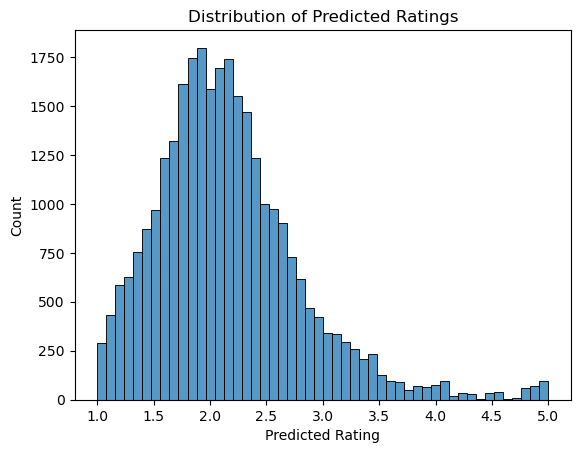

Prediction Statistics:
count    29367.000000
mean         2.161410
std          0.647098
min          1.000000
25%          1.733967
50%          2.079890
75%          2.481199
max          5.000000
Name: rating, dtype: float64


In [51]:
# plot the distribution of predicted ratings

sns.histplot(submission['rating'], bins=50)
plt.title('Distribution of Predicted Ratings')
plt.xlabel('Predicted Rating')
plt.ylabel('Count')
plt.show()
print("Prediction Statistics:")
print(pd.Series(submission['rating']).describe())